In [413]:
import pandas as pd
import os

In [414]:
nouveau_repertoire = "C://Users//TIAO ELIASSE//Desktop//Streamlit_Storytellers//Hackaton INDA"  # Remplacez par votre chemin
os.chdir(nouveau_repertoire)

In [415]:
base19=pd.read_excel("Challenge dataset.xlsx",sheet_name="2019")

In [416]:
base19.shape

(1915, 39)

In [417]:
base19.Poids.isnull().sum()

1809

In [418]:
import pandas as pd

# Exemple de DataFrame
data = {
    'nom': ['A', 'B', 'C', 'D', 'E'],
    'indisponible': ['oui', 'non', 'oui', None, 'non'],
    'eligibilité': ['non', 'oui', None, 'oui', 'non'],
    'accessibilité': [None, 'non', 'oui', 'oui', 'non']
}

df = pd.DataFrame(data)

# Fonction pour compter "oui", "non" et NaN
def compter_valeurs(df, colonnes):
    resultats = {}
    for col in colonnes:
        resultats[col] = {
            'oui': (df[col] == 'oui').sum(),
            'non': (df[col] == 'non').sum(),
            'NaN': df[col].isna().sum()
        }
    return pd.DataFrame(resultats)

# Colonnes à analyser (excluant 'nom')
colonnes_dicho = df.columns.difference(['nom'])

# Comptage des valeurs
resultat = compter_valeurs(df, colonnes_dicho)
print(resultat)


     accessibilité  eligibilité  indisponible
oui              2            2             2
non              2            2             2
NaN              1            1             1


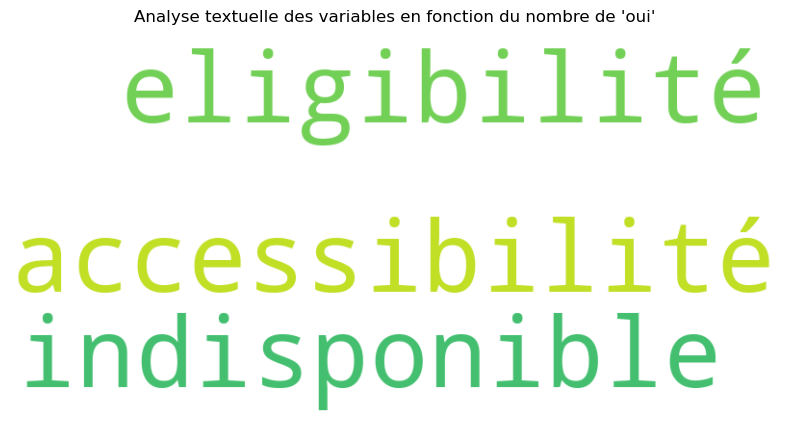

In [419]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Exemple de DataFrame
data = {
    'nom': ['A', 'B', 'C', 'D', 'E'],
    'indisponible': ['oui', 'non', 'oui', None, 'non'],
    'eligibilité': ['non', 'oui', None, 'oui', 'non'],
    'accessibilité': [None, 'non', 'oui', 'oui', 'non']
}

df = pd.DataFrame(data)

# Fonction pour compter le nombre de "oui" par variable
def compter_oui(df, colonnes):
    return {col: (df[col] == 'oui').sum() for col in colonnes}

# Sélectionner les colonnes dichotomiques (excluant 'nom')
colonnes_dicho = df.columns.difference(['nom'])

# Obtenir les fréquences des "oui"
freq_oui = compter_oui(df, colonnes_dicho)

# Générer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
wordcloud.generate_from_frequencies(freq_oui)

# Affichage
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Analyse textuelle des variables en fonction du nombre de 'oui'")
plt.show()


In [420]:
base_update.columns

Index(['Date de remplissage de la fiche', 'Date de naissance',
       'Niveau d'etude', 'Genre', 'Taille', 'Poids',
       'Situation Matrimoniale (SM)', 'Profession',
       'Arrondissement de résidence', 'Quartier de Résidence', 'Nationalité',
       'Religion', 'A-t-il (elle) déjà donné le sang',
       'Si oui preciser la date du dernier don.', 'Taux d’hémoglobine',
       'ÉLIGIBILITÉ AU DON.', 'antibiotherapie', 'hemoglobine_basse',
       'dernier_don_3mois', 'ist_recente', 'dernieres_regles', 'ddr_mauvais',
       'allaitement', 'accouchement_6mois', 'ivg_6mois', 'enceinte', 'autres',
       'valider_envoi', 'transfusion_antecedent', 'porteur_maladies', 'opere',
       'drepanocytaire', 'diabetique', 'hypertendu', 'asthmatique',
       'cardiaque', 'tatoue', 'scarifie', 'autres_non_eligibilite'],
      dtype='object')

In [421]:
variables_dict = {
    "Raison indisponibilité [Est sous anti-biothérapie ]": "antibiotherapie",
    "Raison indisponibilité [Taux d’hémoglobine bas ]": "hemoglobine_basse",
    "Raison indisponibilité [date de dernier Don < 3 mois ]": "dernier_don_3mois",
    "Raison indisponibilité [IST récente (Exclu VIH, Hbs, Hcv)]": "ist_recente",
    "Date de dernières règles (DDR)": "dernieres_regles",
    "Raison de l’indisponibilité de la femme [La DDR est mauvais si <14 jour avant le don]": "ddr_mauvais",
    "Raison de l’indisponibilité de la femme [Allaitement ]": "allaitement",
    "Raison de l’indisponibilité de la femme [A accoucher ces 6 derniers mois ]": "accouchement_6mois",
    "Raison de l’indisponibilité de la femme [Interruption de grossesse ces 06 derniers mois]": "ivg_6mois",
    "Raison de l’indisponibilité de la femme [est enceinte ]": "enceinte",
    "Autre raisons, preciser": "autres",
    "Sélectionner \"ok\" pour envoyer": "valider_envoi",
    "Raison de non-eligibilité totale [Antécédent de transfusion]": "transfusion_antecedent",
    "Raison de non-eligibilité totale [Porteur(HIV,hbs,hcv)]": "porteur_maladies",
    "Raison de non-eligibilité totale [Opéré]": "opere",
    "Raison de non-eligibilité totale [Drepanocytaire]": "drepanocytaire",
    "Raison de non-eligibilité totale [Diabétique]": "diabetique",
    "Raison de non-eligibilité totale [Hypertendus]": "hypertendu",
    "Raison de non-eligibilité totale [Asthmatiques]": "asthmatique",
    "Raison de non-eligibilité totale [Cardiaque]": "cardiaque",
    "Raison de non-eligibilité totale [Tatoué]": "tatoue",
    "Raison de non-eligibilité totale [Scarifié]": "scarifie",
    "Si autres raison préciser": "autres_non_eligibilite"
}


Explication de la catégorisation
1. Raisons d'indisponibilité
Le but ici est de regrouper les raisons en catégories logiques selon la nature de la restriction au don de sang.

raison_medicale : Cette catégorie regroupe les causes médicales temporaires pouvant empêcher un don, comme la prise d’antibiotiques (antibiotherapie), un taux d’hémoglobine trop bas (hemoglobine_basse) ou une infection sexuellement transmissible récente (ist_recente).
contrainte_don : Contient uniquement dernier_don_3mois, car un donneur doit respecter un délai minimum entre deux dons de sang.
raison_gynecologique : Englobe toutes les raisons liées à la santé reproductive et hormonale des femmes, telles que les règles récentes (dernieres_regles, ddr_mauvais), la grossesse (enceinte), l’accouchement récent (accouchement_6mois), l’allaitement (allaitement) et les interruptions de grossesse (ivg_6mois).
autres_raisons : Capture toute autre raison non précisée dans les catégories précédentes.

2. Raisons de non-éligibilité
Les raisons ici sont permanentes ou de longue durée, ce qui empêche définitivement ou sur le long terme une personne de donner son sang.
antecedents_graves : Contient les situations où une personne a subi une intervention lourde ou présente un risque de transmission de maladies graves, comme une transfusion sanguine passée (transfusion_antecedent), le fait d’être porteur du VIH ou d’hépatites (porteur_maladies), ou le fait d’avoir subi une opération chirurgicale majeure (opere).
maladies_chroniques : Cette catégorie regroupe les pathologies qui compromettent durablement la capacité d’un individu à donner son sang, notamment la drépanocytose (drepanocytaire), le diabète (diabetique), l’hypertension (hypertendu), l’asthme (asthmatique) et les maladies cardiaques (cardiaque).
modifications_corporelles : Inclut les tatouages récents (tatoue) et les scarifications (scarifie), qui sont souvent des contre-indications au don pour éviter les risques infectieux.
autres : Capture toute autre raison non spécifiée ailleurs (autres_non_eligibilite).

In [422]:
raisons_indisponibilite = [
    "antibiotherapie",
    "hemoglobine_basse",
    "dernier_don_3mois",
    "ist_recente",
    "dernieres_regles",
    "ddr_mauvais",
    "allaitement",
    "accouchement_6mois",
    "ivg_6mois",
    "enceinte",
    "autres"
]

categories_indisponibilite = {
    "raison_medicale": ["antibiotherapie", "hemoglobine_basse", "ist_recente"],
    "contrainte_don": ["dernier_don_3mois"],
    "raison_gynecologique": ["dernieres_regles", "ddr_mauvais", "allaitement", "accouchement_6mois", "ivg_6mois", "enceinte"],
    "autres_raisons": ["autres"]
}


raisons_non_eligibilite = [
    "transfusion_antecedent",
    "porteur_maladies",
    "opere",
    "drepanocytaire",
    "diabetique",
    "hypertendu",
    "asthmatique",
    "cardiaque",
    "tatoue",
    "scarifie",
    "autres_non_eligibilite"
]

categories_non_eligibilite = {
    "antecedents_graves": ["transfusion_antecedent", "porteur_maladies", "opere"],
    "maladies_chroniques": ["drepanocytaire", "diabetique", "hypertendu", "asthmatique", "cardiaque"],
    "modifications_corporelles": ["tatoue", "scarifie"],
    "autres": ["autres_non_eligibilite"]
}



In [423]:
base_update=pd.read_excel("C://Users//TIAO ELIASSE//Desktop//Streamlit_Storytellers//Hackaton INDA//challenge_update.xlsx",sheet_name=0)

In [424]:
base_update.rename(columns=variables_dict,inplace=True)

In [425]:
base_update.columns

Index(['Date de remplissage de la fiche', 'Date de naissance',
       'Niveau d'etude', 'Genre', 'Taille', 'Poids',
       'Situation Matrimoniale (SM)', 'Profession',
       'Arrondissement de résidence', 'Quartier de Résidence', 'Nationalité',
       'Religion', 'A-t-il (elle) déjà donné le sang',
       'Si oui preciser la date du dernier don.', 'Taux d’hémoglobine',
       'ÉLIGIBILITÉ AU DON.', 'antibiotherapie', 'hemoglobine_basse',
       'dernier_don_3mois', 'ist_recente', 'dernieres_regles', 'ddr_mauvais',
       'allaitement', 'accouchement_6mois', 'ivg_6mois', 'enceinte', 'autres',
       'valider_envoi', 'transfusion_antecedent', 'porteur_maladies', 'opere',
       'drepanocytaire', 'diabetique', 'hypertendu', 'asthmatique',
       'cardiaque', 'tatoue', 'scarifie', 'autres_non_eligibilite'],
      dtype='object')

In [426]:
base_update_ag=pd.read_excel("challenge_update.xlsx",sheet_name=2)

In [427]:
variables_dict_ag = {
    "Raison_indisponibilité__[Est_sous_anti-biothérapie__]": "antibiotherapie",
    "Raison_indisponibilité__[Taux_d’hémoglobine_bas_]": "hemoglobine_basse",
    "Raison_indisponibilité__[date_de_dernier_Don_<_3_mois_]": "dernier_don_3mois",
    "Raison_indisponibilité__[IST_récente_(Exclu_VIH,_Hbs,_Hcv)]": "ist_recente",
    "Date_de_dernières_règles_(DDR)__": "dernieres_regles",
    "Raison_de_l’indisponibilité_de_la_femme_[La_DDR_est_mauvais_si_<14_jour_avant_le_don]": "ddr_mauvais",
    "Raison_de_l’indisponibilité_de_la_femme_[Allaitement_]": "allaitement",
    "Raison_de_l’indisponibilité_de_la_femme_[A_accoucher_ces_6_derniers_mois__]": "accouchement_6mois",
    "Raison_de_l’indisponibilité_de_la_femme_[Interruption_de_grossesse__ces_06_derniers_mois]": "ivg_6mois",
    "Raison_de_l’indisponibilité_de_la_femme_[est_enceinte_]": "enceinte",
    "Autre_raisons,__preciser_": "autres",
    "Sélectionner_\"ok\"_pour_envoyer_": "valider_envoi",
    "Raison_de_non-eligibilité_totale__[Antécédent_de_transfusion]": "transfusion_antecedent",
    "Raison_de_non-eligibilité_totale__[Porteur(HIV,hbs,hcv)]": "porteur_maladies",
    "Raison_de_non-eligibilité_totale__[Opéré]": "opere",
    "Raison_de_non-eligibilité_totale__[Drepanocytaire]": "drepanocytaire",
    "Raison_de_non-eligibilité_totale__[Diabétique]": "diabetique",
    "Raison_de_non-eligibilité_totale__[Hypertendus]": "hypertendu",
    "Raison_de_non-eligibilité_totale__[Asthmatiques]": "asthmatique",
    "Raison_de_non-eligibilité_totale__[Cardiaque]": "cardiaque",
    "Raison_de_non-eligibilité_totale__[Tatoué]": "tatoue",
    "Raison_de_non-eligibilité_totale__[Scarifié]": "scarifie",
    "Si_autres_raison_préciser_": "autres_non_eligibilite"
}


In [428]:
base_update_ag.rename(columns=variables_dict_ag,inplace=True)

In [429]:
len(base_update_ag.columns)

40

In [430]:
raisons_indisponibilite_ag = [
    "antibiotherapie",
    "hemoglobine_basse",
    "dernier_don_3mois",
    "ist_recente",
    "dernieres_regles",
    "ddr_mauvais",
    "allaitement",
    "accouchement_6mois",
    "ivg_6mois",
    "enceinte",
    "autres"
]

categories_indisponibilite_ag = {
    "raison_medicale": ["antibiotherapie", "hemoglobine_basse", "ist_recente"],
    "contrainte_don": ["dernier_don_3mois"],
    "raison_gynecologique": ["dernieres_regles", "ddr_mauvais", "allaitement", "accouchement_6mois", "ivg_6mois", "enceinte"],
    "autres_raisons": ["autres"]
}


In [431]:
raisons_non_eligibilite_ag = [
    "transfusion_antecedent",
    "porteur_maladies",
    "opere",
    "drepanocytaire",
    "diabetique",
    "hypertendu",
    "asthmatique",
    "cardiaque",
    "tatoue",
    "scarifie",
    "autres_non_eligibilite"
]

categories_non_eligibilite_ag = {
    "antecedents_graves": ["transfusion_antecedent", "porteur_maladies", "opere"],
    "maladies_chroniques": ["drepanocytaire", "diabetique", "hypertendu", "asthmatique", "cardiaque"],
    "modifications_corporelles": ["tatoue", "scarifie"],
    "autres_non_eligibilite": ["autres_non_eligibilite"]
}



In [432]:
base_update_ag[raisons_non_eligibilite_ag]

,transfusion_antecedent,porteur_maladies,opere,drepanocytaire,diabetique,hypertendu,asthmatique,cardiaque,tatoue,scarifie,autres_non_eligibilite
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Non,Non,Oui,Non,Non,Non,Non,Non,Non,Non,NaN
2,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Aucune information
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Apurement de la base

In [433]:
#librairies utilies
import pandas as pd
import re 

In [434]:
#importation de la base de données
base_year=pd.read_excel("challenge_update.xlsx",sheet_name=0)
base_donor=pd.read_excel("challenge_update.xlsx",sheet_name=1)
base_age=pd.read_excel("challenge_update.xlsx",sheet_name=2)

In [435]:
#Affichage de la base
base_year.head(10)

,Date de remplissage de la fiche,Date de naissance,Niveau d'etude,Genre,Taille,Poids,Situation Matrimoniale (SM),Profession,Arrondissement de résidence,Quartier de Résidence,...,"Raison de non-eligibilité totale [Porteur(HIV,hbs,hcv)]",Raison de non-eligibilité totale [Opéré],Raison de non-eligibilité totale [Drepanocytaire],Raison de non-eligibilité totale [Diabétique],Raison de non-eligibilité totale [Hypertendus],Raison de non-eligibilité totale [Asthmatiques],Raison de non-eligibilité totale [Cardiaque],Raison de non-eligibilité totale [Tatoué],Raison de non-eligibilité totale [Scarifié],Si autres raison préciser
0,3/11/0019,1999-09-01 00:00:00,Pas Précisé,Homme,NaN,NaN,Célibataire,Chaudronnier,Douala 3,Logbaba,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/21/0019,1978-02-04 00:00:00,Universitaire,Homme,NaN,NaN,Marié (e),Secrétaire comptable,Douala (Non précisé ),NDOGPASSI 2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1977-12-25 00:00:00,1977-12-25 00:00:00,Secondaire,Femme,NaN,NaN,Marié (e),Commerçant (e),Douala (Non précisé ),Dakar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1986-02-06 00:00:00,1986-02-06 00:00:00,Secondaire,Homme,NaN,NaN,Célibataire,Homme d’affaire,Douala 5,NGANGUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1988-05-20 00:00:00,1988-05-20 00:00:00,Pas Précisé,Homme,NaN,NaN,Célibataire,Beat Maker,Douala (Non précisé ),Douala,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1988-05-20 00:00:00,1988-05-20 00:00:00,Pas Précisé,Homme,NaN,NaN,Célibataire,Beat Maker,Douala (Non précisé ),Douala,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1990-02-07 00:00:00,1990-02-01 00:00:00,Secondaire,Homme,NaN,NaN,Célibataire,AGENT D'ENTRETIEN,Douala (Non précisé ),BEPENDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1992-12-06 00:00:00,1992-12-06 00:00:00,Pas Précisé,Homme,NaN,NaN,Célibataire,Technicien d’etancheite,Douala 5,Bepanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1995-01-09 00:00:00,1995-05-11 00:00:00,Secondaire,Homme,NaN,NaN,Célibataire,Mécanicien,Douala 5,Pk14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2013-01-30 00:00:00,1980-11-22 00:00:00,Pas Précisé,Homme,NaN,NaN,Célibataire,Soudeur,Douala (Non précisé ),Ari,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [436]:
base_year["Date de remplissage de la fiche"].unique()

array(['3/11/0019', '3/21/0019', datetime.datetime(1977, 12, 25, 0, 0),
       datetime.datetime(1986, 2, 6, 0, 0),
       datetime.datetime(1988, 5, 20, 0, 0),
       datetime.datetime(1990, 2, 7, 0, 0),
       datetime.datetime(1992, 12, 6, 0, 0),
       datetime.datetime(1995, 1, 9, 0, 0),
       datetime.datetime(2013, 1, 30, 0, 0),
       datetime.datetime(2015, 5, 7, 0, 0),
       datetime.datetime(2018, 1, 17, 0, 0),
       datetime.datetime(2018, 2, 2, 0, 0),
       datetime.datetime(2018, 2, 28, 0, 0),
       datetime.datetime(2018, 4, 1, 0, 0),
       datetime.datetime(2019, 1, 2, 0, 0),
       datetime.datetime(2019, 1, 3, 0, 0),
       datetime.datetime(2019, 1, 4, 0, 0),
       datetime.datetime(2019, 1, 7, 0, 0),
       datetime.datetime(2019, 1, 8, 0, 0),
       datetime.datetime(2019, 1, 9, 0, 0),
       datetime.datetime(2019, 1, 11, 0, 0),
       datetime.datetime(2019, 1, 14, 0, 0),
       datetime.datetime(2019, 1, 15, 0, 0),
       datetime.datetime(2019, 1, 16, 0,

## Apurement de la première base comportant des années de naissance

### Hypothèses

#### Base avec année de naissance

* 1. Date de remplissage de la fiche : 
        * tout le campagne a lieu en 2019 dont toute observation correspondant à une année autre que 2019 sera supprimée
        * les dates de la forme jj/mm/0019 seront remises sous la forme jj/mm/2019
        * toutes les observations ayant une date de remplissage manquante seront supprimées
* 2. Date de naissance : étant donné que nous avons une autre base qui renseigne sur l'âge, nous jugeons inutile d'utiliser cette variable 
* 3. Nationalité : Nous allons renommer ses modalités. Tout ce qui fait reference à une non nationalité sera renommé en "Non précisé" et tout ce qui fait reference à une nationalité et qui est mal orthographié sera bien orthographié
* 4. Religion : Nous allons renommer ses modalités de sorte à bien les orthographier
* 5. Taux d’hémoglobine : certaines modalités comportent les unités donc nous allons effacer ces unités là
* 6. Date de dernières règles (DDR) : à effacer car déjà utiliser pour construire la variable DDR mauvaise
* 7. Sélectionner \"ok\" pour envoyer : à effacer car non pertinent
* 8. Raison d'indisponibilité et de non éligibilité : nous avons renommé toutes les variables en lien avec les raisons en question
        * Nous traitons ensuite la variable autre en lien avec les raisons d'indisponibilité : nous regroupons des modalités similaires sous le même nom et les nan par "sans_raison"
        * Nous traitons de la même manière la variable autre concernant les raison de non éligibilité (autres_non_eligibilite)
* 9. Profession: Nous avons renommer les modalités de cette variable car une même profession apparait plusieurs fois sous des noms orthographiés différemment

#### Base avec age
* 1.  Age : on supprime tous individus ayant les âges de 0 et 1 an 
* 2.  Toute les autres modifications sont faites de la même manière que sur la précédente base

#### Base donneur
* 1. Age : nous avons supprimer tous les individus dont l'age est non numérique ensuite nous avons supprimer l'individu ayant une valeur hors norme comme age

In [437]:
base_year=pd.read_excel("challenge_update.xlsx",sheet_name=0)

In [438]:
base_year.columns

Index(['Date de remplissage de la fiche', 'Date de naissance',
       'Niveau d'etude', 'Genre', 'Taille', 'Poids',
       'Situation Matrimoniale (SM)', 'Profession',
       'Arrondissement de résidence', 'Quartier de Résidence', 'Nationalité',
       'Religion', 'A-t-il (elle) déjà donné le sang',
       'Si oui preciser la date du dernier don.', 'Taux d’hémoglobine',
       'ÉLIGIBILITÉ AU DON.',
       'Raison indisponibilité [Est sous anti-biothérapie ]',
       'Raison indisponibilité [Taux d’hémoglobine bas ]',
       'Raison indisponibilité [date de dernier Don < 3 mois ]',
       'Raison indisponibilité [IST récente (Exclu VIH, Hbs, Hcv)]',
       'Date de dernières règles (DDR)',
       'Raison de l’indisponibilité de la femme [La DDR est mauvais si <14 jour avant le don]',
       'Raison de l’indisponibilité de la femme [Allaitement ]',
       'Raison de l’indisponibilité de la femme [A accoucher ces 6 derniers mois ]',
       'Raison de l’indisponibilité de la femme [Interr

#### Date de remplissage de la fiche

In [439]:
#suppression des modalités à date de remplissage manquante
base_year = base_year.dropna(subset=['Date de remplissage de la fiche'])  


In [440]:
import re

def replace_dates(date_val):
    if isinstance(date_val, str):
        return re.sub(r'(\b[0-1]?[0-9])\/([0-3]?[0-9])\/0019', r'\1/\2/2019', date_val)
    elif isinstance(date_val, pd.Timestamp) and date_val.year == 19:
        return date_val.replace(year=2019)
    return date_val

# Appliquer la correction
base_year['Date de remplissage de la fiche'] = base_year['Date de remplissage de la fiche'].apply(replace_dates)


In [441]:

# Convertir la colonne en datetime
base_year['Date de remplissage de la fiche'] = pd.to_datetime(base_year['Date de remplissage de la fiche'], format='%m/%d/%Y')  

In [442]:
base_year['Date de remplissage de la fiche']

0      2019-03-11
1      2019-03-21
2      1977-12-25
3      1986-02-06
4      1988-05-20
          ...    
1910   2019-05-06
1911   2019-12-09
1912   2019-12-06
1913   2019-05-15
1914   2019-05-08
Name: Date de remplissage de la fiche, Length: 1913, dtype: datetime64[ns]

In [443]:
### Date de naissance


In [444]:
var_quanti=[""]
var_quali=["Genre","Situation Matrimoniale (SM)","Profession","Arrondissement de résidence","Quartier de Résidence","Nationalité","Religion","A-t-il (elle) déjà donné le sang"]

### Nationalité

In [445]:
base_year["Nationalité"].unique()

array(['Camerounaise', 'Malienne', 'Centrafricaine', 'Non precisé',
       'Rien', 'AMERICAINE', 'Malien', 'Tchadienne', 'R.A.S', 'R A S',
       'RAS', 'Ras', 'CENTRAFRICAINE'], dtype=object)

In [446]:
def remplacer_modalites(dataframe, dictionnaire_remplacement, variable):  
    """  
    Remplace les modalités d'une colonne dans un DataFrame selon un dictionnaire de remplacement.  
    
    Parameters:  
    dataframe (pd.DataFrame): Le DataFrame contenant les données.  
    dictionnaire_remplacement (dict): Un dictionnaire où les clés sont les modalités existantes  
                                       et les valeurs sont les nouvelles modalités.  
    variable (str): Le nom de la colonne dans le DataFrame où les modalités doivent être remplacées.  
    
    Returns:  
    pd.DataFrame: Le DataFrame avec les modalités remplacées dans la colonne spécifiée.  
    """  
    
    # Vérifier si la variable existe dans le DataFrame  
    if variable not in dataframe.columns:  
        raise ValueError(f"La colonne '{variable}' n'existe pas dans le DataFrame.")  
    
    # Remplacement des modalités  
    dataframe[variable] = dataframe[variable].replace(dictionnaire_remplacement)  
    
    return dataframe  

#une autre fonction pour renommer les modalités
def remplacer_modalites2(base,variable,dictionnaire):
    for cle, valeur in dictionnaire.items():
        base[variable]=base[variable].replace(cle,valeur )

In [447]:

# Dictionnaire de remplacement  
dictionnaire = {  
    'Rien': "Non precisé",  
    'Malien': 'Malienne',
    'CENTRAFRICAINE':'Centrafricaine', 
    'AMERICAINE':"Américaine",
    "R.A.S":"Non precisé",
    "R A S":"Non precisé",
    'RAS':"Non precisé",
    'Ras':"Non precisé",

}  

# Appel de la fonction  
base_year = remplacer_modalites(base_year, dictionnaire, 'Nationalité')  
  

### Religion

In [448]:
base_year["Religion"].unique()

array(['Pas Précisé', 'Chretien (Ne de nouveau)', 'Chretien (Catholique)',
       'CHRETIEN', 'Epc', 'Chretien (Protestant )', 'Musulman', 'Baptist',
       'Non-croyant', 'PENTECOTISTE', 'Pentecotiste', 'Pentecôtistes',
       'Adventiste', 'Pentecôtiste', 'Chretien', 'Croyant', 'Chrétienne',
       'Chrétien pas précisé', 'Chrétien', 'Chrétien non précisé',
       'aucune', 'Non precise', 'Presbyterien', 'Crois en tout', 'Laïc',
       'Animiste', 'BAPTISTE', 'UEBC', 'Chretien (témoin de Jéhovah)',
       'Traditionaliste', 'Pantecotiste', 'pentecôtiste', 'cmci', 'Loïc',
       'R A S', 'LOIQUE'], dtype=object)

In [449]:
chrétien=['Chretien (Ne de nouveau)','Chretien (Catholique)','CHRETIEN','Chretien (Protestant )','Baptist','Adventiste', 'Pentecôtiste', 'Chretien', 'Chrétienne','Chrétien pas précisé', 'Chrétien', 'Chrétien non précisé',
     'BAPTISTE', 'UEBC', 'Chretien (témoin de Jéhovah)','Non precise', 'Presbyterien','Pantecotiste', 'pentecôtiste', 'cmci','Croyant']
animiste=['R A S','Traditionaliste','Animiste', 'Non precise','Pas Précisé','PENTECOTISTE', 'Pentecotiste', 'Pentecôtistes','Epc']
Laïc=['Laïc','LOIQUE','Loïc','aucune','Non-croyant']

#dic={chrétien:"Chrétien",animiste:"Animiste",Laïc:'Laïc'}
base_year["Religion"]=base_year["Religion"].replace(chrétien,"Chrétien")
base_year["Religion"]=base_year["Religion"].replace(animiste,"Animiste")
base_year["Religion"]=base_year["Religion"].replace(Laïc,"Laïc")


In [450]:
### Taux d’hémoglobine

In [451]:
base_year["Taux d’hémoglobine"].info()

<class 'pandas.core.series.Series'>
Index: 1913 entries, 0 to 1914
Series name: Taux d’hémoglobine
Non-Null Count  Dtype 
--------------  ----- 
1068 non-null   object
dtypes: object(1)
memory usage: 29.9+ KB


In [452]:
def nettoyer_col(dataframe, colonne, unit):  
    """  
    Enlève les unités spécifiées d'une colonne d'un DataFrame et convertit les valeurs en flottant.  

    Parameters:  
    dataframe (pd.DataFrame): Le DataFrame contenant les données.  
    colonne (str): Le nom de la colonne à nettoyer.  
    unit (str): L'unité à supprimer des valeurs.  

    Returns:  
    pd.DataFrame: Le DataFrame avec la colonne nettoyée.  
    """  
    
    # Vérification si la colonne existe dans le DataFrame  
    if colonne not in dataframe.columns:  
        raise ValueError(f"La colonne '{colonne}' n'existe pas dans le DataFrame.")  
    
    # Nettoyage des valeurs de la colonne  
    dataframe[colonne] = (  
        dataframe[colonne]  
        .str.replace(unit, '', regex=False)  # Suppression de l'unité  
        .str.replace(',', '.')                 # Remplacement de la virgule par un point   
        .str.replace(' ', '')                  # Suppression des espaces  
        .astype(float)                         # Conversion en type float  
    )  
    
    return dataframe  

In [453]:
base_year=nettoyer_col(base_year,'Taux d’hémoglobine',"g/dl")

# Raison d'indisponibilité et non éligibilité

In [454]:
# on renomme les noms des raisons
variables_modifie = {  
    "Raison indisponibilité [Est sous anti-biothérapie ]": "antibiotherapie",  
    "Raison indisponibilité [Taux d’hémoglobine bas ]": "hemoglobine_basse",  
    "Raison indisponibilité [date de dernier Don < 3 mois ]": "dernier_don_3mois",  
    "Raison indisponibilité [IST récente (Exclu VIH, Hbs, Hcv)]": "ist_recente",  
    "Date de dernières règles (DDR)": "dernieres_regles",  
    "Raison de l’indisponibilité de la femme [La DDR est mauvais si <14 jour avant le don]": "ddr_mauvais",  
    "Raison de l’indisponibilité de la femme [Allaitement ]": "allaitement",  
    "Raison de l’indisponibilité de la femme [A accoucher ces 6 derniers mois ]": "accouchement_6mois",  
    "Raison de l’indisponibilité de la femme [Interruption de grossesse ces 06 derniers mois]": "ivg_6mois",  
    "Raison de l’indisponibilité de la femme [est enceinte ]": "enceinte",  
    "Autre raisons, preciser": "autres",  
    "Sélectionner \"ok\" pour envoyer": "valider_envoi",  
    "Raison de non-eligibilité totale [Antécédent de transfusion]": "transfusion_antecedent",  
    "Raison de non-eligibilité totale [Porteur(HIV,hbs,hcv)]": "porteur_maladies",  
    "Raison de non-eligibilité totale [Opéré]": "opere",  
    "Raison de non-eligibilité totale [Drepanocytaire]": "drepanocytaire",  
    "Raison de non-eligibilité totale [Diabétique]": "diabetique",  
    "Raison de non-eligibilité totale [Hypertendus]": "hypertendu",  
    "Raison de non-eligibilité totale [Asthmatiques]": "asthmatique",  
    "Raison de non-eligibilité totale [Cardiaque]": "cardiaque",  
    "Raison de non-eligibilité totale [Tatoué]": "tatoue",  
    "Raison de non-eligibilité totale [Scarifié]": "scarifie",  
    "Si autres raison préciser": "autres_non_eligibilite"  
}  


In [455]:
base_year.rename(columns=variables_modifie,inplace=True)

In [456]:
base_year.columns

Index(['Date de remplissage de la fiche', 'Date de naissance',
       'Niveau d'etude', 'Genre', 'Taille', 'Poids',
       'Situation Matrimoniale (SM)', 'Profession',
       'Arrondissement de résidence', 'Quartier de Résidence', 'Nationalité',
       'Religion', 'A-t-il (elle) déjà donné le sang',
       'Si oui preciser la date du dernier don.', 'Taux d’hémoglobine',
       'ÉLIGIBILITÉ AU DON.', 'antibiotherapie', 'hemoglobine_basse',
       'dernier_don_3mois', 'ist_recente', 'dernieres_regles', 'ddr_mauvais',
       'allaitement', 'accouchement_6mois', 'ivg_6mois', 'enceinte', 'autres',
       'valider_envoi', 'transfusion_antecedent', 'porteur_maladies', 'opere',
       'drepanocytaire', 'diabetique', 'hypertendu', 'asthmatique',
       'cardiaque', 'tatoue', 'scarifie', 'autres_non_eligibilite'],
      dtype='object')

#### Gestion de la modalité autres dans les raisons d'indisponibilité pour les femmes 

In [457]:
base_year["ÉLIGIBILITÉ AU DON."].unique()

array(['Eligible', 'Temporairement Non-eligible',
       'Définitivement non-eligible'], dtype=object)

In [458]:
df=base_year
# Standardisation des modalités  
df['autres'] = df['autres'].str.lower()  # Tout en minuscules  
df['autres'] = df['autres'].str.replace('«\\xa0', '', regex=True).str.replace('\\xa0»', '', regex=True)  

# Regroupement des modalités similaires  
df['autres'] = df['autres'].replace({  
    'cocaïne': 'drogue',  
    'eu à consommer de la cocaïne et d autre drogues': 'drogue',  
    'consommation de drogue': 'drogue',  
    "consommation de drogues": 'drogue', 
    "rapport non protege":'rapport_non_protege',
    'rapport non proteger': 'rapport_non_protege',  
    'rapport non proteges': 'rapport_non_protege',  
    'rapports non proteges': 'rapport_non_protege',  
    'pas de raison specifiques': 'sans_raison',  
    'ras': 'sans_raison',  
    'raison non precisee': 'sans_raison',  
    'a aucune': 'sans_raison',  
    'aucune': 'sans_raison', 
    'pris de médicaments diclojenal': 'medicament',  
    'prise d’un médicament diclojenac': 'medicament',  
    'maladie cardio vasculaire': 'maladie_cardio',  
    'changé de partenaire et eu des rapports non protégé': 'rapport_non_protege', 
    'rapport non protégé et changement de partenaire': 'changement_partenaire',  
    'voyagé dans des zones épidémiques': 'voyage_zone_epidemique',  
    'a été transfusé': 'transfusion'  
})  

# Remplacement des NaN par 'sans_raison'  
df['autres'].fillna('sans_raison', inplace=True)  

df["autres"].unique() 

array(['sans_raison', 'opérée', 'drogue', 'maladie_cardio', 'medicament',
       'rapport_non_protege', 'changement_partenaire', 'transfusion',
       'voyage_zone_epidemique'], dtype=object)

#### autres raisons de non éligibilité


In [459]:
base_test=base_year.copy()

In [460]:
base_test["autres_non_eligibilite"].unique()

array([nan, 'Mal de nerf', 'physiquement amorti',
       'maladie chronique, suivi medical regulier',
       'ANGINE DE LA POITRINE ,ARTÉRITE , INFARCTUS DU MYOCARDE',
       'EU UNE ENDOSCOPIE ( FIBROSCOPIE, GASTROSCOPIE, COLOSCOPIE .......)',
       'MENOPOSÉ', 'Consommation de drogue', 'DROGUES',
       'Aucune information', 'PAS D INFORMATION SUR SON DOSSIER',
       'EU UNE ENDOSCOPIE', 'TRAITE PAR ACUPUNCTURE',
       'ETE TRAITE PAR ACUPUNCTURE'], dtype=object)

In [461]:
df=base_year

# Standardisation des modalités  
df['autres_non_eligibilite'] = df['autres_non_eligibilite'].str.lower()  # Tout en minuscules  
df['autres_non_eligibilite'] = df['autres_non_eligibilite'].str.replace('«\\xa0', '', regex=True).str.replace('\\xa0»', '', regex=True)  

# Regroupement des modalités similaires  
df['autres_non_eligibilite'] = df['autres_non_eligibilite'].replace({  
    'mal de nerf': 'douleur_nervale',  
    'physiquement amorti': 'fatigue',  
    'maladie chronique, suivi medical regulier': 'maladie_chronique',  
    'angine de la poitrine ,artérite , infarctus du myocarde': 'maladie_cardiaque',  
    'eu une endoscopie ( fibroscopie, gastroscopie, coloscopie .......)': 'endoscopie',  
    'eu une endoscopie': 'endoscopie',  
    'menoposé': 'menopause',  
    'consommation de drogue': 'drogue',  
    'drogues': 'drogue',  
    'pas d information sur son dossier': 'sans_raison',  
    'traite par acupuncture': 'acupuncture',  
    'ete traite par acupuncture': 'acupuncture'  
})  

# Remplacement des NaN par 'informations_manquantes'  
df['autres_non_eligibilite'].fillna('sans_raison', inplace=True)  

df["autres_non_eligibilite"].unique()

array(['sans_raison', 'douleur_nervale', 'fatigue', 'maladie_chronique',
       'maladie_cardiaque', 'endoscopie', 'menopause', 'drogue',
       'aucune information', 'acupuncture'], dtype=object)

### Date de dernières règles (DDR) et Sélectionner \"ok\" pour envoyer"

In [462]:
base_year.drop(columns=['valider_envoi', 'dernieres_regles'], inplace=True) 

#### Catégorisation des variables raison d'indisponibilité

In [463]:
raisons_indisponibilite_ag = [
    "antibiotherapie",
    "hemoglobine_basse",
    "dernier_don_3mois",
    "ist_recente",
    "ddr_mauvais",
    "allaitement",
    "accouchement_6mois",
    "ivg_6mois",
    "enceinte"
]

categories_indisponibilite_ag = {
    "raison_medicale": ["antibiotherapie", "hemoglobine_basse", "ist_recente"],
    "contrainte_don": ["dernier_don_3mois"],
    "raison_gynecologique": ["ddr_mauvais", "allaitement", "accouchement_6mois", "ivg_6mois", "enceinte"]
}




In [464]:
df=base_year
# Création de la variable Raisons_Indisponibility  
def determine_raison(row):  
    for category, raisons in categories_indisponibilite_ag.items():  
        if any(row[raison] == 'Oui' for raison in raisons):  
            return category  
    return row['autres']  # Si aucune raison n'est 'Oui', retourner la valeur de 'autres'  

# Application de la fonction à chaque ligne  
df['Raisons_Indisponibility'] = df.apply(determine_raison, axis=1)  

df["Raisons_Indisponibility"].unique()

array(['sans_raison', 'raison_medicale', 'raison_gynecologique', 'drogue',
       'maladie_cardio', 'contrainte_don', 'medicament',
       'rapport_non_protege'], dtype=object)

#### Catégorisation des variables raisons de non eligibilité

In [465]:
raisons_non_eligibilite_ag = [
    "transfusion_antecedent",
    "porteur_maladies",
    "opere",
    "drepanocytaire",
    "diabetique",
    "hypertendu",
    "asthmatique",
    "cardiaque",
    "tatoue",
    "scarifie"
]

categories_non_eligibilite_ag = {
    "antecedents_graves": ["transfusion_antecedent", "porteur_maladies", "opere"],
    "maladies_chroniques": ["drepanocytaire", "diabetique", "hypertendu", "asthmatique", "cardiaque"],
    "modifications_corporelles": ["tatoue", "scarifie"]
}



In [466]:
df=base_year

# Catégories de non-élégibilité  
categories_non_eligibilite_ag = {  
    "antecedents_graves": ["transfusion_antecedent", "porteur_maladies", "opere"],  
    "maladies_chroniques": ["drepanocytaire", "diabetique", "hypertendu", "asthmatique", "cardiaque"],  
    "modifications_corporelles": ["tatoue", "scarifie"]  
}  

# Création de la variable Raisons_Non_Eligibilite  
def determine_non_eligibilite(row):  
    for category, raisons in categories_non_eligibilite_ag.items():  
        if any(row[raison] == 'Oui' for raison in raisons):  
            return category  
    return row['autres_non_eligibilite']  # Si aucune raison n'est 'Oui', retourner la valeur de 'autres'  

# Application de la fonction à chaque ligne  
df['Raisons_Non_Eligibilite'] = df.apply(determine_non_eligibilite, axis=1)  

  
df["Raisons_Non_Eligibilite"].unique()

array(['sans_raison', 'maladies_chroniques', 'antecedents_graves',
       'douleur_nervale', 'fatigue', 'modifications_corporelles',
       'maladie_chronique', 'drogue', 'aucune information', 'endoscopie',
       'acupuncture'], dtype=object)

In [467]:
base_year.columns

Index(['Date de remplissage de la fiche', 'Date de naissance',
       'Niveau d'etude', 'Genre', 'Taille', 'Poids',
       'Situation Matrimoniale (SM)', 'Profession',
       'Arrondissement de résidence', 'Quartier de Résidence', 'Nationalité',
       'Religion', 'A-t-il (elle) déjà donné le sang',
       'Si oui preciser la date du dernier don.', 'Taux d’hémoglobine',
       'ÉLIGIBILITÉ AU DON.', 'antibiotherapie', 'hemoglobine_basse',
       'dernier_don_3mois', 'ist_recente', 'ddr_mauvais', 'allaitement',
       'accouchement_6mois', 'ivg_6mois', 'enceinte', 'autres',
       'transfusion_antecedent', 'porteur_maladies', 'opere', 'drepanocytaire',
       'diabetique', 'hypertendu', 'asthmatique', 'cardiaque', 'tatoue',
       'scarifie', 'autres_non_eligibilite', 'Raisons_Indisponibility',
       'Raisons_Non_Eligibilite'],
      dtype='object')

### Profession

In [468]:
base_test=base_year.copy()

In [469]:
base_test["Profession"].unique()

array(['Chaudronnier', 'Secrétaire comptable', 'Commerçant (e)',
       'Homme d’affaire', 'Beat Maker', "AGENT D'ENTRETIEN",
       'Technicien d’etancheite', 'Mécanicien', 'Soudeur', 'Estheticien',
       'Etudiant (e)', 'Negoce bois', 'Juriste', 'Agent de securite',
       'Vigil', 'Plombier', 'Maçon', 'Eleve', 'Agent technique', 'Trieur',
       'Chauffeur', 'Machiniste', 'Maitresse', 'Chargée de communication',
       'Technicien', 'Sans Emplois', 'TECHNICIEN EN AGRICULTURE',
       "Homme d'affaire", 'FOOTBALLEUR', 'Enseignant (e)', 'Comptable',
       'Realisateur', 'Electricien', "Infor'aticien",
       'Technicien supérieur d’agriculture', 'Ménagère',
       'Agent commercial', 'Intendant infirmier supérieur',
       'Agent immobilier', 'Vendeur', 'Cableur', 'Électricien', 'Élève',
       'Technicien de laboratoire', 'Docker',
       'Développeur en informatique', 'Commercial', 'Footballeur',
       'Dolker', 'Ingénieur', 'Stagiaitaire C U D',
       'Agent de maintenance indu

In [470]:
base_year['Arrondissement de résidence'].unique()

array(['Douala 3', 'Douala (Non précisé )', 'Douala 5', 'Douala 1',
       'Yaounde', 'Douala 2', 'Douala 4', 'Bafoussam', 'Dschang',
       'Non précisé', 'Buea', 'Kribi', 'Pas précisé', 'Njombe', 'TIKO',
       'Edea', 'Manjo', 'West', 'Douala', 'Yaoundé', 'OYACK', 'Nkouabang',
       'BUEA', 'Deido', 'Pas mentionné', 'Douala 6', 'batie',
       'Bomono Ba Mbegue', 'Meiganga', 'Pas precise', 'non precisé',
       'SUD OUEST TOMBEL', 'Ngodi Bakoko', 'Ras', 'R A S', 'LIMBE', 'RAS',
       'DCANKONGMONDO', 'BOKO'], dtype=object)

In [471]:
Arrondi_a_renom=['Non précisé','Pas précisé','RAS','R A S','Ras','Pas mentionné', 'non precisé','Pas precise','Douala (Non précisé )']

Remplacons tous ce qui est dans la variable Arrondi_a_renom par autres

In [472]:
df=base_year.copy()

In [473]:
# Remplacer les modalités dans la colonne Arrondissement
df['Arrondissement de résidence'] = df['Arrondissement de résidence'].replace(  Arrondi_a_renom, 'autres')
df['Arrondissement de résidence'] = df['Arrondissement de résidence'].replace("Yaounde", 'Yaoundé')


Eligibilité

Nous allons considerer toute personne indisponible ou non eligible totale par non eligible

In [474]:
var=['Définitivement non-eligible','Temporairement Non-eligible']

In [475]:
df['ÉLIGIBILITÉ AU DON.']=df['ÉLIGIBILITÉ AU DON.'].replace(var, "non éligible")

Renommons certainnes modalités de la variable réligion

In [476]:
df["Religion"].unique()

array(['Animiste', 'Chrétien', 'Musulman', 'Laïc', 'Crois en tout'],
      dtype=object)

In [477]:
chrétien=['Chretien (Ne de nouveau)','Chretien (Catholique)','CHRETIEN','Chretien (Protestant )','Baptist','Adventiste', 'Pentecôtiste', 'Chretien', 'Chrétienne','Chrétien pas précisé', 'Chrétien', 'Chrétien non précisé',
     'BAPTISTE', 'UEBC', 'Chretien (témoin de Jéhovah)','Non precise', 'Presbyterien','Pantecotiste', 'pentecôtiste', 'cmci','Croyant']
animiste=['R A S','Traditionaliste','Animiste', 'Non precise','Pas Précisé','PENTECOTISTE', 'Pentecotiste', 'Pentecôtistes','Epc']
Laïc=['Laïc','LOIQUE','Loïc','aucune','Non-croyant']

#dic={chrétien:"Chrétien",animiste:"Animiste",Laïc:'Laïc'}
df["Religion"]=df["Religion"].replace(chrétien,"Chrétien")
df["Religion"]=df["Religion"].replace(animiste,"Animiste")
df["Religion"]=df["Religion"].replace(Laïc,"Laïc")


Renommons certainnes modalité de la colonne Nationalité

In [478]:
df['Nationalité'].unique()

array(['Camerounaise', 'Malienne', 'Centrafricaine', 'Non precisé',
       'Américaine', 'Tchadienne'], dtype=object)

Nous constatons des nationalités qui renvoient a la meme nationalité

In [479]:
Non_precisé=[ 'R.A.S', 'R A S',
       'RAS', 'Ras','Non precisé',
       'Rien']
Malienne=[ 'Malien','Malienne',]

Centrafricaine=['Centrafricaine','CENTRAFRICAINE']

In [480]:
df["Nationalité"]=df['Nationalité'].replace(Centrafricaine,'Centrafricaine')
df["Nationalité"]=df['Nationalité'].replace(Malienne,'Malienne')
df["Nationalité"]=df['Nationalité'].replace(Non_precisé,'Non_precisé')

In [481]:
df['Nationalité'].unique()

array(['Camerounaise', 'Malienne', 'Centrafricaine', 'Non_precisé',
       'Américaine', 'Tchadienne'], dtype=object)

In [482]:

corrections = {
    "administrateur": "Administrateur",
    "administrateur des hopitaux": "Administrateur des hôpitaux",
    "agent de sécurité": "Agent de sécurité",
    "agent securité": "Agent de sécurité",
    "angent de securité": "Agent de sécurité",
    "businesman": "Businessman",
    "cadre contractuel": "Cadre",
    "chaudronier": "Chaudronnier",
    "comptable financier": "Comptable financier",
    "comptable gestionaire": "Comptable",
    "declamant douane": "Déclarant en douane",
    "declarant douane": "Déclarant en douane",
    "déclarant de douane": "Déclarant en douane",
    "docker": "Docker",
    "dolker": "Docker",
    "electro mecanicien": "Électromécanicien",
    "electricien": "Électricien",
    "eleve": "Élève",
    "enginieur": "Ingénieur",
    "ingénieur des travaux médicaux": "Ingénieur biomédical",
    "informaticien": "Informaticien",
    "informaticien de réseau": "Informaticien en réseau",
    "informaticien de reseau": "Informaticien en réseau",
    "informatticien": "Informaticien",
    "infor'aticien": "Informaticien",
    "magasinier": "Magasinier",
    "machiniste": "Machiniste",
    "mecanicien": "Mécanicien",
    "peintre": "Peintre",
    "plombier": "Plombier",
    "r a s":"Non précisé",
    "sans emplois": "Sans emploi",
    "secretaire": "Secrétaire",
    "technicien": "Technicien",
    "technicien de securite": "Technicien en sécurité",
    "technicien du génie sanitaire": "Technicien en génie sanitaire",
    "technicien endiscopie": "Technicien en endoscopie",
    "technicien en batiment": "Technicien en bâtiment",
    "vigil": "Agent de sécurité",
    "pas précisé": "Non précisé",
    "pas précisé": "Non précisé",
    "pas précise": "Non précisé",
    "non precise": "Non précisé",
    "chomeur": "Chômeur",
    "footballeur": "Footballeur",
    "hotelier": "Hôtelier",
    "gestionnaire de ressources humaines": "Gestionnaire des ressources humaines",
    "gestionnaire ressources humaines": "Gestionnaire des ressources humaines"
}
df['Profession'] = df['Profession'].replace(corrections)


In [483]:
df.to_excel("Base_year.xlsx", index=False)

# Appurement base avec age

In [484]:
base_age=pd.read_excel("challenge_update.xlsx",sheet_name=2)

In [485]:
base_age.columns

Index(['ID', 'Age', 'Horodateur', 'Niveau_d'etude', 'Genre_', 'Taille_',
       'Poids', 'Situation_Matrimoniale_(SM)', 'Profession_',
       'Arrondissement_de_résidence_', 'Quartier_de_Résidence_',
       'Nationalité_', 'Religion_', 'A-t-il_(elle)_déjà_donné_le_sang_',
       'Si_oui_preciser_la_date_du_dernier_don._', 'Taux_d’hémoglobine_',
       'ÉLIGIBILITÉ_AU_DON.',
       'Raison_indisponibilité__[Est_sous_anti-biothérapie__]',
       'Raison_indisponibilité__[Taux_d’hémoglobine_bas_]',
       'Raison_indisponibilité__[date_de_dernier_Don_<_3_mois_]',
       'Raison_indisponibilité__[IST_récente_(Exclu_VIH,_Hbs,_Hcv)]',
       'Date_de_dernières_règles_(DDR)__',
       'Raison_de_l’indisponibilité_de_la_femme_[La_DDR_est_mauvais_si_<14_jour_avant_le_don]',
       'Raison_de_l’indisponibilité_de_la_femme_[Allaitement_]',
       'Raison_de_l’indisponibilité_de_la_femme_[A_accoucher_ces_6_derniers_mois__]',
       'Raison_de_l’indisponibilité_de_la_femme_[Interruption_de_grossess

## Age

In [486]:
base_age["Age"].info()#isnull().sum()

<class 'pandas.core.series.Series'>
RangeIndex: 1846 entries, 0 to 1845
Series name: Age
Non-Null Count  Dtype
--------------  -----
1846 non-null   int64
dtypes: int64(1)
memory usage: 14.6 KB


In [487]:
# Suppression des individus dont l'âge est 0 ou 1 an  
df=base_age
base_age= base_age[(base_age['Age'] != 0) & (base_age['Age'] != 1)] 

In [488]:
base_age["Nationalité_"].unique()

array(['Camerounaise', 'R A S', 'RAS', 'Tchadienne', 'R.A.S', 'Malien',
       'Centrafricaine', 'Malienne', 'CENTRAFRICAINE', 'AMERICAINE',
       'Ras'], dtype=object)

In [489]:
# Dictionnaire de renommage  
renommage = {  
    'R A S': "Non precisé",  
    'RAS': "Non precisé",  
    'R.A.S': "Non precisé",  
    'Malien': 'Malienne',
    'CENTRAFRICAINE': 'Centrafricaine',  
    'AMERICAINE': 'Américaine',  
    'Ras': 'Non precisé'  
} 
base_age=remplacer_modalites(base_age,renommage,"Nationalité_")

C:\Users\TIAO ELIASSE\AppData\Local\Temp\ipykernel_36712\3069698026.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[variable] = dataframe[variable].replace(dictionnaire_remplacement)


## Réligion

In [490]:
base_age["Religion_"].unique()

array(['Chretien (Catholique)', 'Pas Précisé', 'Musulman', 'Adventiste',
       'Chretien (Protestant )', 'Non-croyant', 'pentecôtiste',
       'Chretien (Ne de nouveau)', 'Pentecôtiste', 'BAPTISTE',
       'Traditionaliste', 'Chrétien non précisé', 'Pentecotiste',
       'CHRETIEN', 'PENTECOTISTE', 'Chretien (témoin de Jéhovah)',
       'Chretien', 'LOIQUE', 'Pantecotiste', 'cmci', 'Animiste',
       'Crois en tout', 'Epc', 'UEBC', 'aucune', 'Laïc', 'Presbyterien',
       'Non precise', 'Croyant', 'Baptist', 'Chrétien pas précisé',
       'Chrétienne', 'Chrétien', 'Pentecôtistes', 'Loïc'], dtype=object)

In [491]:
# Dictionnaire de remplacement  
dictionnaire_remplacement = {  
    "Pas Précisé": "Non précisé",  
    'Chretien (Ne de nouveau)': "Chrétien (Né de nouveau)",  
    'Chretien (Catholique)': 'Chrétien (Catholique)',  
    'Chretien (Protestant )': 'Chrétien (Protestant)',   
    'Baptist': 'Baptiste',  
    'PENTECOTISTE': 'Pentecotiste',  
    "Pentecôtistes": 'Pentecotiste',   
    'Chretien': "Chrétien (Non précisé)",  
    "Chrétien": "Chrétien (Non précisé)", 
    "Chrétienne": "Chrétien (Non précisé)",  
    "Chrétien pas précisé": "Chrétien (Non précisé)",  
    "Chrétien non précisé": "Chrétien (Non précisé)",  
    'aucune': 'Aucune',  
    'CHRETIEN': "Chrétien (Non précisé)",  
    'Non precise': "Non précisé",  
    'Presbyterien': "Presbytérien",  
    'Crois en tout': "Croyant",  
    'Laïc': "Laïc",    
    'BAPTISTE': 'Baptiste',  
    'UEBC': 'Baptiste',  
    'Chretien (témoin de Jéhovah)': "Chrétien (Témoin de Jéhovah)",   
    'Pantecotiste': 'Pentecotiste',  
    "pentecôtiste": 'Pentecotiste',  
    "Pentecôtiste": 'Pentecotiste', 
    'cmci': 'CMCI',  
    "Loïc": "Laïc",  
    'R A S': 'Non précisé', 
    "Aucune": 'Non précisé', 
    'LOIQUE': "Laïc"  
}  

base_age=remplacer_modalites(base_age,dictionnaire_remplacement,"Religion_") 

C:\Users\TIAO ELIASSE\AppData\Local\Temp\ipykernel_36712\3069698026.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[variable] = dataframe[variable].replace(dictionnaire_remplacement)


## Raisons

In [492]:
# Dictionnaire qui mappe les anciennes variables aux nouvelles  
variables_modifie = {  
    "Raison_indisponibilité__[Est_sous_anti-biothérapie__]": "antibiotherapie",  
    "Raison_indisponibilité__[Taux_d’hémoglobine_bas_]": "hemoglobine_basse",  
    "Raison_indisponibilité__[date_de_dernier_Don_<_3_mois_]": "dernier_don_3mois",  
    "Raison_indisponibilité__[IST_récente_(Exclu_VIH,_Hbs,_Hcv)]": "ist_recente",  
    "Date_de_dernières_règles_(DDR)__": "dernieres_regles",  
    "Raison_de_l’indisponibilité_de_la_femme_[La_DDR_est_mauvais_si_<14_jour_avant_le_don]": "ddr_mauvais",  
    "Raison_de_l’indisponibilité_de_la_femme_[Allaitement_]": "allaitement",  
    "Raison_de_l’indisponibilité_de_la_femme_[A_accoucher_ces_6_derniers_mois__]": "accouchement_6mois",  
    "Raison_de_l’indisponibilité_de_la_femme_[Interruption_de_grossesse__ces_06_derniers_mois]": "ivg_6mois",  
    "Raison_de_l’indisponibilité_de_la_femme_[est_enceinte_]": "enceinte",  
    "Autre_raisons,__preciser_": "autres",  
    "Sélectionner_\"ok\"_pour_envoyer_": "valider_envoi",  
    "Raison_de_non-eligibilité_totale__[Antécédent_de_transfusion]": "transfusion_antecedent",  
    "Raison_de_non-eligibilité_totale__[Porteur(HIV,hbs,hcv)]": "porteur_maladies",  
    "Raison_de_non-eligibilité_totale__[Opéré]": "opere",  
    "Raison_de_non-eligibilité_totale__[Drepanocytaire]": "drepanocytaire",  
    "Raison_de_non-eligibilité_totale__[Diabétique]": "diabetique",  
    "Raison_de_non-eligibilité_totale__[Hypertendus]": "hypertendu",  
    "Raison_de_non-eligibilité_totale__[Asthmatiques]": "asthmatique",  
    "Raison_de_non-eligibilité_totale__[Cardiaque]": "cardiaque",  
    "Raison_de_non-eligibilité_totale__[Tatoué]": "tatoue",  
    "Raison_de_non-eligibilité_totale__[Scarifié]": "scarifie",  
    "Si_autres_raison_préciser_": "autres_non_eligibilite"  
}  

base_age.rename(columns=variables_modifie,inplace=True)

C:\Users\TIAO ELIASSE\AppData\Local\Temp\ipykernel_36712\1816508139.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_age.rename(columns=variables_modifie,inplace=True)


In [493]:
base_age.columns

Index(['ID', 'Age', 'Horodateur', 'Niveau_d'etude', 'Genre_', 'Taille_',
       'Poids', 'Situation_Matrimoniale_(SM)', 'Profession_',
       'Arrondissement_de_résidence_', 'Quartier_de_Résidence_',
       'Nationalité_', 'Religion_', 'A-t-il_(elle)_déjà_donné_le_sang_',
       'Si_oui_preciser_la_date_du_dernier_don._', 'Taux_d’hémoglobine_',
       'ÉLIGIBILITÉ_AU_DON.', 'antibiotherapie', 'hemoglobine_basse',
       'dernier_don_3mois', 'ist_recente', 'dernieres_regles', 'ddr_mauvais',
       'allaitement', 'accouchement_6mois', 'ivg_6mois', 'enceinte', 'autres',
       'valider_envoi', 'transfusion_antecedent', 'porteur_maladies', 'opere',
       'drepanocytaire', 'diabetique', 'hypertendu', 'asthmatique',
       'cardiaque', 'tatoue', 'scarifie', 'autres_non_eligibilite'],
      dtype='object')

### Autre indisponibilité

In [494]:
base_age["autres"].unique()

array([nan, 'Rapport non protégé et changement de partenaire', 'Aucune',
       'RAISON NON PRECISEE', 'A été transfusé',
       'Prise d’un médicament «\xa0DICLOJENAC\xa0»',
       'PAS DE RAISON SPECIFIQUES', 'RAPPORT NON PROTEGER',
       'RAPPORT NON PROTEGE', 'maladie cardio vasculaire',
       'Consommation de drogue',
       'Eu à consommer de la cocaïne et d autre drogues',
       'Changé de partenaire et eu des rapports non protégé', 'RAS',
       'RAPPORTS NON PROTEGES', 'CONSOMMATION DE DROGUES'], dtype=object)

In [495]:
df=base_year
# Standardisation des modalités  
df['autres'] = df['autres'].str.lower()  # Tout en minuscules  
df['autres'] = df['autres'].str.replace('«\\xa0', '', regex=True).str.replace('\\xa0»', '', regex=True)  

# Regroupement des modalités similaires  
df['autres'] = df['autres'].replace({  
    'cocaïne': 'drogue',  
    'eu à consommer de la cocaïne et d autre drogues': 'drogue',  
    'consommation de drogue': 'drogue',  
    "consommation de drogues": 'drogue', 
    "rapport non protege":'rapport_non_protege',
    'rapport non proteger': 'rapport_non_protege',  
    'rapport non proteges': 'rapport_non_protege',  
    'rapports non proteges': 'rapport_non_protege',  
    'pas de raison specifiques': 'sans_raison',  
    'ras': 'sans_raison',  
    'raison non precisee': 'sans_raison',  
    'a aucune': 'sans_raison',  
    'aucune': 'sans_raison', 
    'pris de médicaments diclojenal': 'medicament',  
    'prise d’un médicament diclojenac': 'medicament',  
    'maladie cardio vasculaire': 'maladie_cardio',  
    'changé de partenaire et eu des rapports non protégé': 'rapport_non_protege', 
    'rapport non protégé et changement de partenaire': 'changement_partenaire',  
    'voyagé dans des zones épidémiques': 'voyage_zone_epidemique',  
    'a été transfusé': 'transfusion'  
})  

# Remplacement des NaN par 'sans_raison'  
df['autres'].fillna('sans_raison', inplace=True)  

df["autres"].unique() 

array(['sans_raison', 'opérée', 'drogue', 'maladie_cardio', 'medicament',
       'rapport_non_protege', 'changement_partenaire', 'transfusion',
       'voyage_zone_epidemique'], dtype=object)

## autres non eligibilité

In [496]:
base_age["autres_non_eligibilite"].unique()

array([nan, 'Aucune information',
       'EU UNE ENDOSCOPIE ( FIBROSCOPIE, GASTROSCOPIE, COLOSCOPIE .......)',
       'physiquement amorti', 'TRAITE PAR ACUPUNCTURE', 'Mal de nerf',
       'PAS D INFORMATION SUR SON DOSSIER', 'Consommation de drogue',
       'MENOPOSÉ', 'ETE TRAITE PAR ACUPUNCTURE', 'EU UNE ENDOSCOPIE',
       'DROGUES', 'maladie chronique, suivi medical regulier',
       'ANGINE DE LA POITRINE ,ARTÉRITE , INFARCTUS DU MYOCARDE'],
      dtype=object)

In [497]:
df=base_age

# Standardisation des modalités  
df['autres_non_eligibilite'] = df['autres_non_eligibilite'].str.lower()  # Tout en minuscules  
df['autres_non_eligibilite'] = df['autres_non_eligibilite'].str.replace('«\\xa0', '', regex=True).str.replace('\\xa0»', '', regex=True)  

# Regroupement des modalités similaires  
df['autres_non_eligibilite'] = df['autres_non_eligibilite'].replace({  
    'mal de nerf': 'douleur_nervale',  
    'physiquement amorti': 'fatigue',  
    'maladie chronique, suivi medical regulier': 'maladie_chronique',  
    'angine de la poitrine ,artérite , infarctus du myocarde': 'maladie_cardiaque',  
    'eu une endoscopie ( fibroscopie, gastroscopie, coloscopie .......)': 'endoscopie',  
    'eu une endoscopie': 'endoscopie',  
    'menoposé': 'menopause',  
    'consommation de drogue': 'drogue',  
    'drogues': 'drogue',  
    'pas d information sur son dossier': 'sans_raison',  
    'traite par acupuncture': 'acupuncture',  
    'ete traite par acupuncture': 'acupuncture'  
})  

# Remplacement des NaN par 'informations_manquantes'  
df['autres_non_eligibilite'].fillna('sans_raison', inplace=True)  

df["autres_non_eligibilite"].unique()

array(['sans_raison', 'aucune information', 'endoscopie', 'fatigue',
       'acupuncture', 'douleur_nervale', 'drogue', 'menopause',
       'maladie_chronique', 'maladie_cardiaque'], dtype=object)

### ddr et selection ok

In [498]:
base_age.columns

Index(['ID', 'Age', 'Horodateur', 'Niveau_d'etude', 'Genre_', 'Taille_',
       'Poids', 'Situation_Matrimoniale_(SM)', 'Profession_',
       'Arrondissement_de_résidence_', 'Quartier_de_Résidence_',
       'Nationalité_', 'Religion_', 'A-t-il_(elle)_déjà_donné_le_sang_',
       'Si_oui_preciser_la_date_du_dernier_don._', 'Taux_d’hémoglobine_',
       'ÉLIGIBILITÉ_AU_DON.', 'antibiotherapie', 'hemoglobine_basse',
       'dernier_don_3mois', 'ist_recente', 'dernieres_regles', 'ddr_mauvais',
       'allaitement', 'accouchement_6mois', 'ivg_6mois', 'enceinte', 'autres',
       'valider_envoi', 'transfusion_antecedent', 'porteur_maladies', 'opere',
       'drepanocytaire', 'diabetique', 'hypertendu', 'asthmatique',
       'cardiaque', 'tatoue', 'scarifie', 'autres_non_eligibilite'],
      dtype='object')

In [499]:
base_age.drop(columns=['valider_envoi', 'dernieres_regles'], inplace=True) 

## categorisation raison indisponibilité

In [500]:
raisons_indisponibilite_ag = [
    "antibiotherapie",
    "hemoglobine_basse",
    "dernier_don_3mois",
    "ist_recente",
    "ddr_mauvais",
    "allaitement",
    "accouchement_6mois",
    "ivg_6mois",
    "enceinte"
]

categories_indisponibilite_ag = {
    "raison_medicale": ["antibiotherapie", "hemoglobine_basse", "ist_recente"],
    "contrainte_don": ["dernier_don_3mois"],
    "raison_gynecologique": ["ddr_mauvais", "allaitement", "accouchement_6mois", "ivg_6mois", "enceinte"]
}




In [501]:
base_age["autres"].unique()

array([nan, 'Rapport non protégé et changement de partenaire', 'Aucune',
       'RAISON NON PRECISEE', 'A été transfusé',
       'Prise d’un médicament «\xa0DICLOJENAC\xa0»',
       'PAS DE RAISON SPECIFIQUES', 'RAPPORT NON PROTEGER',
       'RAPPORT NON PROTEGE', 'maladie cardio vasculaire',
       'Consommation de drogue',
       'Eu à consommer de la cocaïne et d autre drogues',
       'Changé de partenaire et eu des rapports non protégé', 'RAS',
       'RAPPORTS NON PROTEGES', 'CONSOMMATION DE DROGUES'], dtype=object)

### autre dans indisponible

In [502]:
df=base_age
# Standardisation des modalités  
df['autres'] = df['autres'].str.lower()  # Tout en minuscules  
df['autres'] = df['autres'].str.replace('«\\xa0', '', regex=True).str.replace('\\xa0»', '', regex=True)  

# Regroupement des modalités similaires  
df['autres'] = df['autres'].replace({  
    'cocaïne': 'drogue',  
    'eu à consommer de la cocaïne et d autre drogues': 'drogue',  
    'consommation de drogue': 'drogue',  
    "consommation de drogues": 'drogue', 
    "rapport non protege":'rapport_non_protege',
    'rapport non proteger': 'rapport_non_protege',  
    'rapport non proteges': 'rapport_non_protege',  
    'rapports non proteges': 'rapport_non_protege',  
    'pas de raison specifiques': 'sans_raison',  
    'ras': 'sans_raison',  
    'raison non precisee': 'sans_raison',  
    'a aucune': 'sans_raison',  
    'aucune': 'sans_raison', 
    'pris de médicaments diclojenal': 'medicament',  
    'prise d’un médicament diclojenac': 'medicament',  
    'maladie cardio vasculaire': 'maladie_cardio',  
    'changé de partenaire et eu des rapports non protégé': 'rapport_non_protege', 
    'rapport non protégé et changement de partenaire': 'changement_partenaire',  
    'voyagé dans des zones épidémiques': 'voyage_zone_epidemique',  
    'a été transfusé': 'transfusion'  
})  

# Remplacement des NaN par 'sans_raison'  
df['autres'].fillna('sans_raison', inplace=True)  

df["autres"].unique() 

array(['sans_raison', 'changement_partenaire', 'transfusion',
       'medicament', 'rapport_non_protege', 'maladie_cardio', 'drogue'],
      dtype=object)

In [503]:
df=base_age
# Création de la variable Raisons_Indisponibility  
def determine_raison(row):  
    for category, raisons in categories_indisponibilite_ag.items():  
        if any(row[raison] == 'Oui' for raison in raisons):  
            return category  
    return row['autres']  # Si aucune raison n'est 'Oui', retourner la valeur de 'autres'  

# Application de la fonction à chaque ligne  
df['Raisons_Indisponibility'] = df.apply(determine_raison, axis=1)  

df["Raisons_Indisponibility"].unique()

array(['sans_raison', 'raison_medicale', 'contrainte_don',
       'raison_gynecologique', 'medicament', 'rapport_non_protege',
       'maladie_cardio', 'drogue'], dtype=object)

### raison non eligibilité

In [504]:
base_age["autres_non_eligibilite"].unique()

array(['sans_raison', 'aucune information', 'endoscopie', 'fatigue',
       'acupuncture', 'douleur_nervale', 'drogue', 'menopause',
       'maladie_chronique', 'maladie_cardiaque'], dtype=object)

In [505]:
df=base_age

# Standardisation des modalités  
df['autres_non_eligibilite'] = df['autres_non_eligibilite'].str.lower()  # Tout en minuscules  
df['autres_non_eligibilite'] = df['autres_non_eligibilite'].str.replace('«\\xa0', '', regex=True).str.replace('\\xa0»', '', regex=True)  

# Regroupement des modalités similaires  
df['autres_non_eligibilite'] = df['autres_non_eligibilite'].replace({  
    'mal de nerf': 'douleur_nervale',  
    'physiquement amorti': 'fatigue',  
    'maladie chronique, suivi medical regulier': 'maladie_chronique',  
    'angine de la poitrine ,artérite , infarctus du myocarde': 'maladie_cardiaque',  
    'eu une endoscopie ( fibroscopie, gastroscopie, coloscopie .......)': 'endoscopie',  
    'eu une endoscopie': 'endoscopie',  
    'menoposé': 'menopause',  
    'consommation de drogue': 'drogue',  
    'drogues': 'drogue',  
    'pas d information sur son dossier': 'sans_raison',  
    'traite par acupuncture': 'acupuncture',  
    'ete traite par acupuncture': 'acupuncture'  
})  

# Remplacement des NaN par 'informations_manquantes'  
df['autres_non_eligibilite'].fillna('sans_raison', inplace=True)  

df["autres_non_eligibilite"].unique()

array(['sans_raison', 'aucune information', 'endoscopie', 'fatigue',
       'acupuncture', 'douleur_nervale', 'drogue', 'menopause',
       'maladie_chronique', 'maladie_cardiaque'], dtype=object)

In [506]:
base_age["Raisons_Indisponibility"].unique()

array(['sans_raison', 'raison_medicale', 'contrainte_don',
       'raison_gynecologique', 'medicament', 'rapport_non_protege',
       'maladie_cardio', 'drogue'], dtype=object)

In [507]:
df=base_age

# Catégories de non-élégibilité  
categories_non_eligibilite_ag = {  
    "antecedents_graves": ["transfusion_antecedent", "porteur_maladies", "opere"],  
    "maladies_chroniques": ["drepanocytaire", "diabetique", "hypertendu", "asthmatique", "cardiaque"],  
    "modifications_corporelles": ["tatoue", "scarifie"]  
}  

# Création de la variable Raisons_Non_Eligibilite  
def determine_non_eligibilite(row):  
    for category, raisons in categories_non_eligibilite_ag.items():  
        if any(row[raison] == 'Oui' for raison in raisons):  
            return category  
    return row['autres_non_eligibilite']  # Si aucune raison n'est 'Oui', retourner la valeur de 'autres'  

# Application de la fonction à chaque ligne  
df['Raisons_Non_Eligibilite'] = df.apply(determine_non_eligibilite, axis=1)  

  
df["Raisons_Non_Eligibilite"].unique()

array(['sans_raison', 'antecedents_graves', 'aucune information',
       'maladies_chroniques', 'modifications_corporelles', 'fatigue',
       'acupuncture', 'douleur_nervale', 'endoscopie', 'drogue',
       'maladie_chronique'], dtype=object)

In [510]:
base_age.to_excel("Base_age.xlsx", index=False)

# Appurement base donneurs 

In [511]:
base_donneur=pd.read_excel("challenge_update.xlsx",sheet_name="Donneurs 2019")

In [512]:
base_donneur.columns

Index(['Horodateur', 'Sexe', 'Age', 'Type de donation',
       'Groupe Sanguin ABO / Rhesus', 'Phenotype'],
      dtype='object')

In [ ]:
base_donneur["Age"].describe()

count    1666.000000
mean       31.348139
std         8.003681
min        18.000000
25%        25.000000
50%        30.000000
75%        36.000000
max        59.000000
Name: Age, dtype: float64

In [ ]:
df=base_donneur
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  

# Supprimer les NaN (valeurs non numériques)  
base_donneur = df.dropna()  

In [ ]:
base_donneur = base_donneur[base_donneur['Age'] != 0]  

In [ ]:
# Identifier l'âge maximal  
age_max = base_donneur['Age'].max()  

# Suppression de l'observation dont l'âge est le maximal  
base_donneur = base_donneur[base_donneur['Age'] != age_max] 

In [515]:
base_donneur['Sexe'].unique()

array(['M', 'F'], dtype=object)

In [516]:
base_donneur["Sexe"]=base_donneur['Sexe'].replace({"M":'Masculin',"F":"Feminin"})


In [518]:
base_donneur['Type de donation']=base_donneur['Type de donation'].replace({'F':'Familliaux','B':"Bénevolats"})

In [519]:
base_donneur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Horodateur                   1900 non-null   object
 1   Sexe                         1900 non-null   object
 2   Age                          1900 non-null   object
 3   Type de donation             1679 non-null   object
 4   Groupe Sanguin ABO / Rhesus  1900 non-null   object
 5   Phenotype                    1900 non-null   object
dtypes: object(6)
memory usage: 89.2+ KB


In [520]:
base_donneur.to_excel("Base_donneur.xlsx", index=False)